In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [112]:
# https://www.kaggle.com/datasets/mekalamadhankumar/super-store-data

In [113]:
# Load your CSV data 
dataframe = pd.read_csv('C:/Users/imthi/Desktop/DataScience_Assignments/Superstore_data.csv')

In [114]:
dataframe.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [115]:
dataframe.shape

(9994, 21)

In [116]:
# Correlation of total Data
dataframe.corr

<bound method DataFrame.corr of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156  11/08/2016  11/11/2016    Second Class   
1          2  CA-2016-152156  11/08/2016  11/11/2016    Second Class   
2          3  CA-2016-138688  06/12/2016  06/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422  01/21/2014  01/23/2014    Second Class   
9990    9991  CA-2017-121258  02/26/2017  03/03/2017  Standard Class   
9991    9992  CA-2017-121258  02/26/2017  03/03/2017  Standard Class   
9992    9993  CA-2017-121258  02/26/2017  03/03/2017  Standard Class   
9993    9994  CA-2017-119914  05/04/2017  05/09/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

In [117]:
# Calculate skewness and kurtosis for the 'Sales' column
sales_skewness = skew(dataframe['Sales'])
sales_kurtosis = kurtosis(dataframe['Sales'])

print(f"Skewness of Sales: {sales_skewness}")
print(f"Kurtosis of Sales: {sales_kurtosis}")

Skewness of Sales: 12.970805179533526
Kurtosis of Sales: 305.15842681749734


In [118]:
dataframe.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [119]:
#Null Values 
dataframe.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

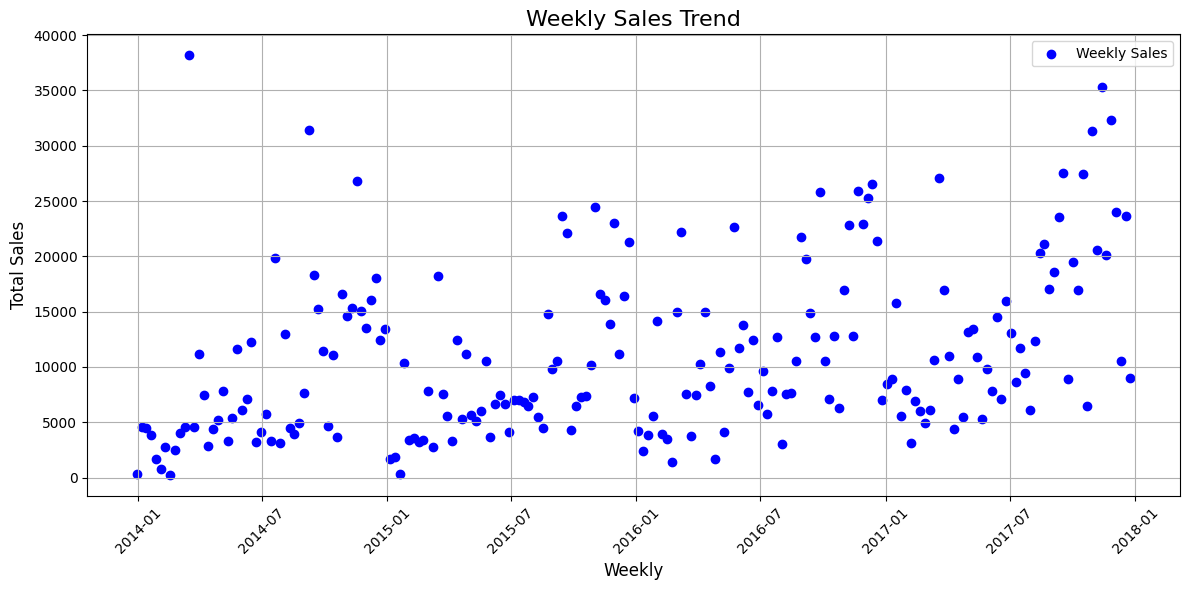

In [120]:
#1. Scatter plot- Monthly Sales Trend
def weekly_sales (dataframe):
    dataframe = dataframe.sort_values('Order Date')
    dataframe['Order Date'] = pd.to_datetime(dataframe['Order Date'])
    dataframe['Week'] = dataframe['Order Date'].dt.to_period('W')
    weekly_sales = dataframe.groupby('Week')['Sales'].sum()
    plt.figure(figsize=(12, 6))
    plt.scatter(weekly_sales.index.to_timestamp(), weekly_sales.values, color='blue', marker='o', label='Weekly Sales')
    plt.title('Weekly Sales Trend', fontsize=16)
    plt.xlabel('Weekly', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()
weekly_sales(dataframe)

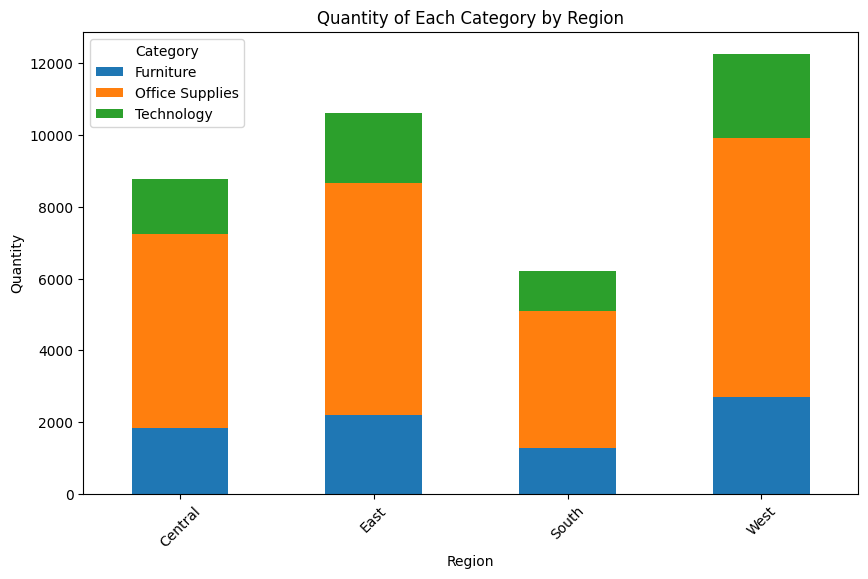

In [121]:
# 2. Stacked Bar - Quantity of Each Category by Region
def quan_of_each_category_by_region (dataframe):
    region_category_data = dataframe.groupby(['Region', 'Category'])['Quantity'].sum().unstack()
    region_category_data.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Quantity of Each Category by Region')
    plt.xlabel('Region')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45)
    plt.legend(title='Category')
    plt.show()
quan_of_each_category_by_region (dataframe)

<Figure size 1200x600 with 0 Axes>

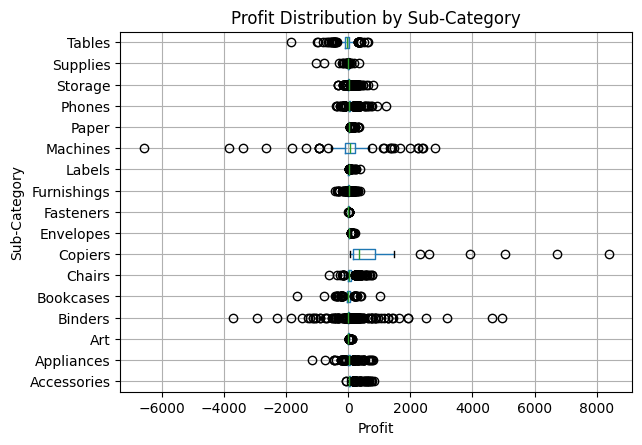

In [122]:
# 3. Boxplot - Profit Distribution by Sub-Category
def profit_dist_by_sub_category (dataframe):
    plt.figure(figsize=(12, 6))
    dataframe.boxplot(column='Profit', by='Sub-Category', vert=False)
    plt.title('Profit Distribution by Sub-Category')
    plt.suptitle('')
    plt.xlabel('Profit')
    plt.show()
profit_dist_by_sub_category (dataframe)